In [1]:
import pandas as pd
train = pd.read_csv("/Users/kirangangaraju/Desktop/Python/ZugZwang/ML/CSVs/Project_train.csv")

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Renaming Stage

In [3]:
train = train.rename(columns = {'PassengerId':'No.' , 'Pclass':'Class' , 'SibSp':'Siblings/Spouse' , 'Parch':'Parents/Children'})
train.head()

,No.,Survived,Class,Name,Sex,Age,Siblings/Spouse,Parents/Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 ### Reordering Stage

In [4]:
train = train[['No.','Name','Sex','Age','Class','Cabin','Ticket','Siblings/Spouse','Parents/Children','Fare','Embarked','Survived']]
train.head()

,No.,Name,Sex,Age,Class,Cabin,Ticket,Siblings/Spouse,Parents/Children,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,3,NaN,A/5 21171,1,0,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,C85,PC 17599,1,0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,3,NaN,STON/O2. 3101282,0,0,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,C123,113803,1,0,53.1000,S,1
4,5,"Allen, Mr. William Henry",male,35.0,3,NaN,373450,0,0,8.0500,S,0


In [5]:
total_nan = train["Survived"].isna().sum()  
total_nan

### Number of NaN's
# Age - 177/891
# Cabin - 687/891
# Embarked - 2/891

0

### Differentiating with the Categories (Inputation)

In [6]:
# No. - Not important     --------------------------
# Name - Not important    --------------------------
# Sex - One Hot Encoding  >>>>>>>>>>>>>>>>>>>>>>  Done
# Age - No encoding required but many NaN  >>>>>>>>>>>>>>>>>>>>  Done
# Cabin - Not important   --------------------------
# Ticket - Not important  --------------------------
# Sib/Sp - No encoding required
# Par/Ch - No encoding required
# Fare - Not important  -------------------------- 
# Embarked - One Hot Encoding  >>>>>>>>>>>>>>>>>>>>>>>  Done

train.drop(["No."], axis=1, inplace = True)
train.drop(["Name"], axis=1, inplace = True)
train.drop(["Fare"], axis=1, inplace = True)
train.drop(["Cabin"], axis=1, inplace = True)
train.drop(["Ticket"], axis=1, inplace = True)
train

,Sex,Age,Class,Siblings/Spouse,Parents/Children,Embarked,Survived
0,male,22.0,3,1,0,S,0
1,female,38.0,1,1,0,C,1
2,female,26.0,3,0,0,S,1
3,female,35.0,1,1,0,S,1
4,male,35.0,3,0,0,S,0
...,...,...,...,...,...,...,...
886,male,27.0,2,0,0,S,0
887,female,19.0,1,0,0,S,1
888,female,NaN,3,1,2,S,0
889,male,26.0,1,0,0,C,1


In [7]:
age_mean = train.Age.mean()
age_mean = round(age_mean, 1)
emb_max = train.Embarked.mode()

In [8]:
train.Age = train.Age.fillna(age_mean)
train.Embarked = train.Embarked.fillna('S')
train

,Sex,Age,Class,Siblings/Spouse,Parents/Children,Embarked,Survived
0,male,22.0,3,1,0,S,0
1,female,38.0,1,1,0,C,1
2,female,26.0,3,0,0,S,1
3,female,35.0,1,1,0,S,1
4,male,35.0,3,0,0,S,0
...,...,...,...,...,...,...,...
886,male,27.0,2,0,0,S,0
887,female,19.0,1,0,0,S,1
888,female,29.7,3,1,2,S,0
889,male,26.0,1,0,0,C,1


In [9]:
is_nan = train["Embarked"].isna().values.any()  # Check
is_nan

False

### One-Hot Encoding

In [10]:
train_encoded = pd.get_dummies(train, columns = ['Sex'])
train_encoded

,Age,Class,Siblings/Spouse,Parents/Children,Embarked,Survived,Sex_female,Sex_male
0,22.0,3,1,0,S,0,0,1
1,38.0,1,1,0,C,1,1,0
2,26.0,3,0,0,S,1,1,0
3,35.0,1,1,0,S,1,1,0
4,35.0,3,0,0,S,0,0,1
...,...,...,...,...,...,...,...,...
886,27.0,2,0,0,S,0,0,1
887,19.0,1,0,0,S,1,1,0
888,29.7,3,1,2,S,0,1,0
889,26.0,1,0,0,C,1,0,1


In [11]:
train_encoded = pd.get_dummies(train_encoded, columns = ['Embarked'])
train_encoded

,Age,Class,Siblings/Spouse,Parents/Children,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,1,0,0,0,1,0,0,1
1,38.0,1,1,0,1,1,0,1,0,0
2,26.0,3,0,0,1,1,0,0,0,1
3,35.0,1,1,0,1,1,0,0,0,1
4,35.0,3,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,2,0,0,0,0,1,0,0,1
887,19.0,1,0,0,1,1,0,0,0,1
888,29.7,3,1,2,0,1,0,0,0,1
889,26.0,1,0,0,1,0,1,1,0,0


In [12]:
output = train_encoded.pop("Survived")             # Quick reordering
train_encoded = pd.concat([train_encoded, output], axis=1)
train_encoded

,Age,Class,Siblings/Spouse,Parents/Children,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,3,1,0,0,1,0,0,1,0
1,38.0,1,1,0,1,0,1,0,0,1
2,26.0,3,0,0,1,0,0,0,1,1
3,35.0,1,1,0,1,0,0,0,1,1
4,35.0,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,27.0,2,0,0,0,1,0,0,1,0
887,19.0,1,0,0,1,0,0,0,1,1
888,29.7,3,1,2,1,0,0,0,1,0
889,26.0,1,0,0,0,1,1,0,0,1


### Accuracy Test

#### Splitting input and output

In [13]:
X = train_encoded.drop('Survived', axis=1)
Y = train_encoded['Survived']

In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)  # Splitting so RFC can leanrn the patterns
model = RFC()
model.fit(X_train,Y_train)   # Data which will be used to learn
prediction = model.predict(X_test)   # prediction is the X values that will be tested on
result = accuracy(Y_test, prediction)   # applying learning and checking if results are same as Y_test
print (round (result*100 , 2))

80.45


### Visualisation

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn

#### Gender

Text(0, 0.5, 'Number')

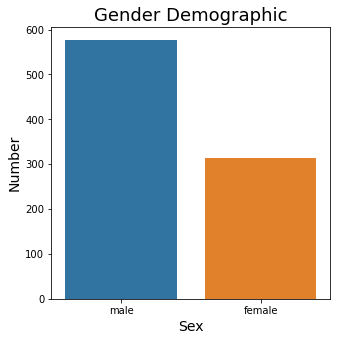

In [17]:
fig, ax = plt.subplots(figsize=(5,5))   
sn.countplot(train['Sex'], ax=ax, data=train)

plt.title("Gender Demographic", fontsize = 18)  
plt.xlabel("Sex", fontsize = 14)              
plt.ylabel("Number", fontsize = 14)

In [18]:
################################################

#### Embarked

Text(0, 0.5, 'Number')

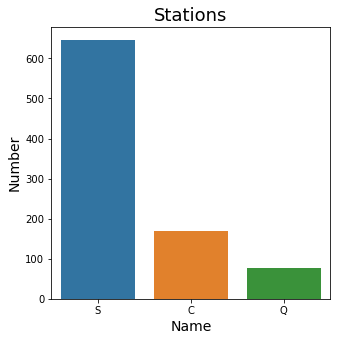

In [19]:
fig, ax = plt.subplots(figsize=(5,5))   
sn.countplot(train['Embarked'], ax=ax, data=train)

plt.title("Stations", fontsize = 18)  
plt.xlabel("Name", fontsize = 14)              
plt.ylabel("Number", fontsize = 14)

In [20]:
################################################

#### Survival

Text(0, 0.5, 'Number')

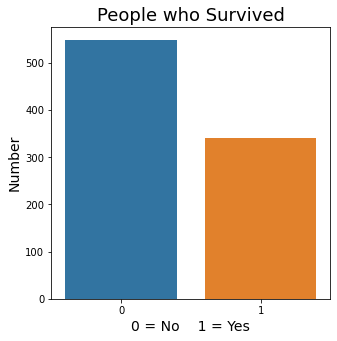

In [21]:
fig, ax = plt.subplots(figsize=(5,5))   
sn.countplot(train['Survived'], ax=ax, data=train)

plt.title("People who Survived", fontsize = 18)  
plt.xlabel("0 = No    1 = Yes", fontsize = 14)              
plt.ylabel("Number", fontsize = 14)

In [22]:
################################################

#### Surivival (Embarked where)

Text(0, 0.5, 'Number of')

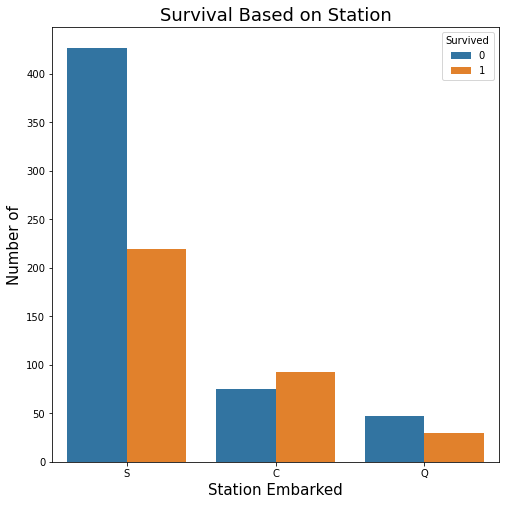

In [23]:
plt.figure(figsize = (8,8))
sn.countplot(x = train['Embarked'] , hue = train['Survived'] , data=train)

plt.title("Survival Based on Station", fontsize = 18)
plt.xlabel("Station Embarked", fontsize = 15)
plt.ylabel("Number of", fontsize = 15)

In [24]:
################################################

#### Survival (Male & Female)

Text(0, 0.5, 'Number of Survivors')

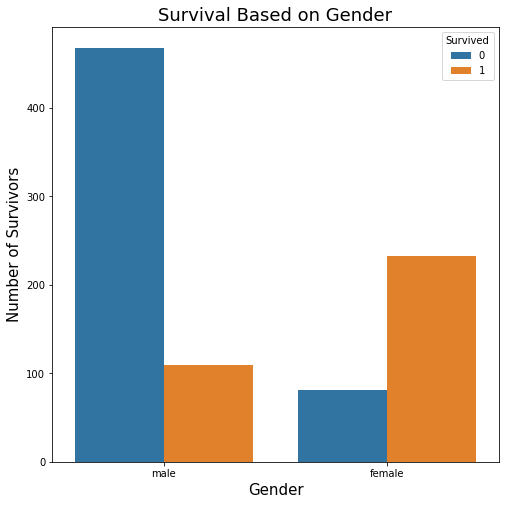

In [25]:
plt.figure(figsize = (8,8))
sn.countplot(x = train['Sex'] , hue = train['Survived'] , data=train)

plt.title("Survival Based on Gender", fontsize = 18)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Number of Survivors", fontsize = 15)

In [26]:
################################################

#### Class vs Survival

Text(0, 0.5, 'Number of Survivors')

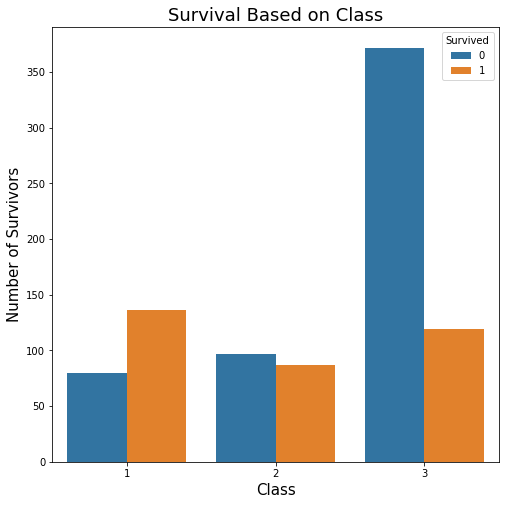

In [27]:
plt.figure(figsize = (8,8))
sn.countplot(x = train['Class'] , hue = train['Survived'] , data=train)

plt.title("Survival Based on Class", fontsize = 18)
plt.xlabel("Class", fontsize = 15)
plt.ylabel("Number of Survivors", fontsize = 15)

In [28]:
################################################

#### Class vs Gender

Text(0, 0.5, 'Number of')

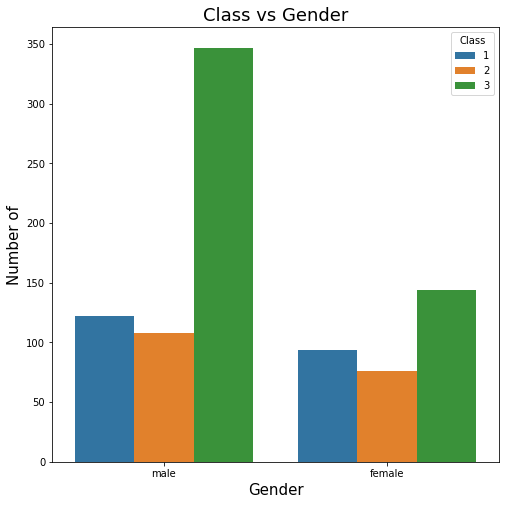

In [29]:
plt.figure(figsize = (8,8))
sn.countplot(x = train['Sex'] , hue = train['Class'] , data=train)

plt.title("Class vs Gender", fontsize = 18)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Number of", fontsize = 15)